In [1]:
import pandas as pd

## Data analysis and preprocessing

In [2]:
diamonds_df = pd.read_csv('datasets\diamonds\diamonds.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [7]:
diamonds_df.info()
# There are 9 features, of which 3 are categorical (cut, color and clarity) and 6 numerical (float64). The targe variable, price, is int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [6]:
diamonds_df.isna().sum()
#There are no missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


Some interesting insigths:
    - comparing the mean of each feature, they are very different, so they should be scaled to the same range
    - x,y and z have min=0, which means there's one or more outliers that should be removed since this are physical quantities
    - price has min=-1, which also indicates the presence of outliers since the price must be greater than 0

#### Handling categorical data
The categorical variables are cut, color and clarity. The three of them are ordinal, meaning that there's an order between variables. For example, for 'cut', 'Good' > 'Fair', and 'Premium' >> 'Fair'. The same applies to 'color' and 'clarity' (judging from the reference images provided in _md-images). So we can use ordinal encoding, which assigns a numeric value to each variable.
If there was no relationship between classes (for example, in a variable 'country'), one-hot encoding should be used instead, but this come with the disadvantage of increasing the dimensionality of the data.  

In [13]:
print(diamonds_df['cut'].unique())
print(diamonds_df['color'].unique())
print(diamonds_df['clarity'].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['H' 'I' 'F' 'G' 'E' 'D' 'J']
['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


In [39]:
cut_order = [['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']]
color_order = [['D','E','F','G','H','I','J']]
clarity_order = [['IF','VVS1', 'VVS2','VS1','VS2','SI1','SI2','I1']]

In [40]:
from sklearn.preprocessing import OrdinalEncoder
cut_encoder  = OrdinalEncoder(categories=cut_order)
color_encoder  = OrdinalEncoder(categories=color_order)
clarity_encoder  = OrdinalEncoder(categories=clarity_order)
diamonds_df['cut']  = cut_encoder.fit_transform(diamonds_df['cut'].values.reshape(-1, 1))
diamonds_df['color']  = color_encoder.fit_transform(diamonds_df['color'].values.reshape(-1, 1))
diamonds_df['clarity']  = clarity_encoder.fit_transform(diamonds_df['clarity'].values.reshape(-1, 1))


In [41]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,0.0,4.0,6.0,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,0.0,4.0,5.0,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,1.0,5.0,5.0,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,0.0,2.0,5.0,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,2.0,2.0,4.0,61.7,57.0,4493,6.17,6.21,3.82


## Model selection
Considering the context of the problem, the chosen model should perform regression (as the targe variable 'price' is numerical) and should alse be interpretable (because the clients want to know how the price is calculated). So a first try would be a linear regression, but before we need to check if the data fullfils the linear regression assumptions.

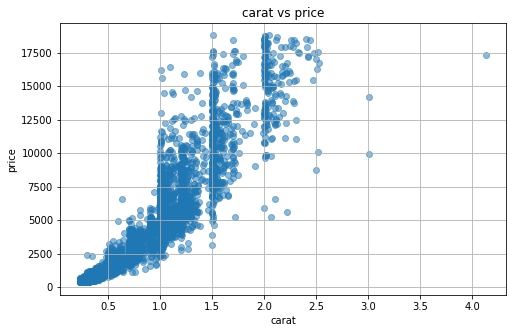

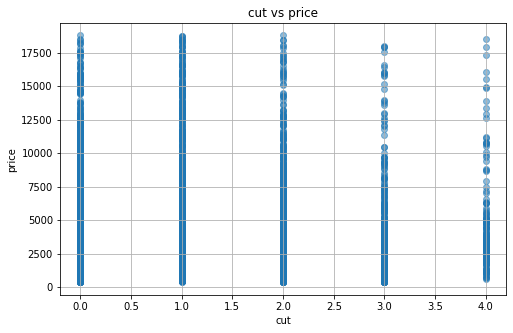

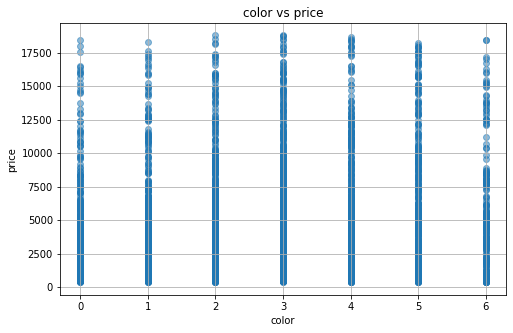

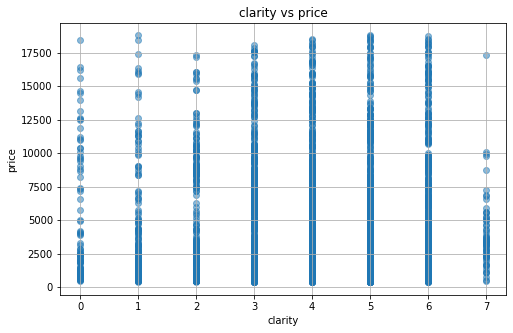

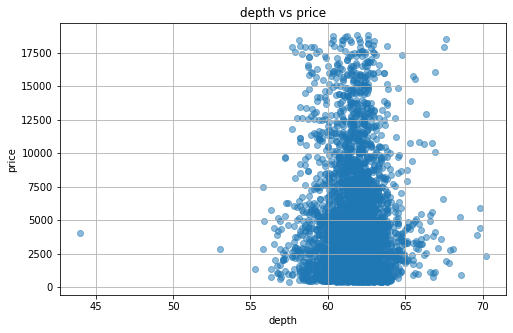

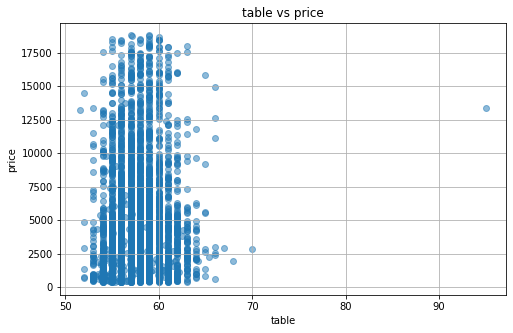

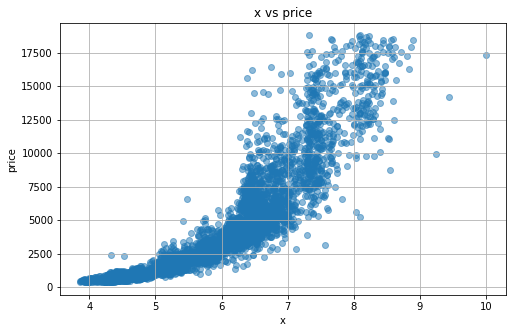

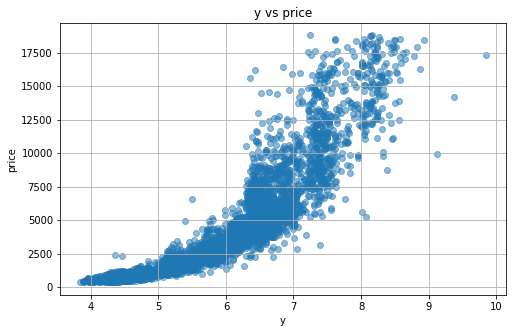

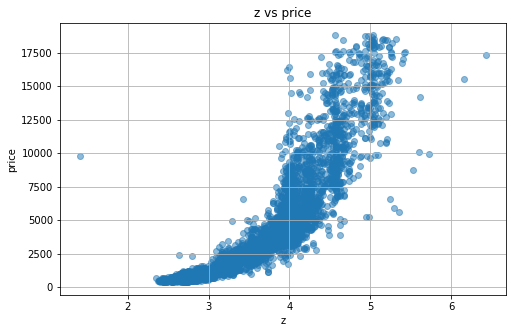

In [70]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the name of the target column
target_column = 'price'

# Get the list of column names excluding the target column
feature_columns = [col for col in diamonds_df.columns if col != target_column]

# Plot each feature against the target
for feature in feature_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(diamonds_df[feature], diamonds_df[target_column], alpha=0.5)
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()


In [74]:
# Let's calculate Persons coefficient to determine the degree of linearity of the features
import numpy as np
from scipy.stats import pearsonr, spearmanr


feature_values = diamonds_df['x'].values
target_values = diamonds_df['price'].values
# Calculate Pearson correlation coefficient
pearson_corr = np.corrcoef(feature_values, target_values)[0, 1]

# Calculate Spearman rank correlation coefficient
spearman_corr, _ = spearmanr(feature_values, target_values)

print("Pearson correlation coefficient:", pearson_corr)
print("Spearman rank correlation coefficient:", spearman_corr)


Pearson correlation coefficient: 0.8870512509048754
Spearman rank correlation coefficient: 0.9627251806022371


#### Handling outliers
In the previous plots, there are points that appear to be outliers, as they are too far away from the others. For example, the point with x=0, y=0, z=0 is crearly a mistake and should be removed. Also the points with price=-1, which don't provide any useful information

In [63]:
diamonds_df[diamonds_df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,1.0,4.0,6.0,62.8,59.0,18034,0.0,0.0,0.0


In [64]:
diamonds_df[diamonds_df['price'] < 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,3.0,2.0,5.0,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,0.0,1.0,4.0,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,0.0,6.0,5.0,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,0.0,4.0,4.0,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,0.0,3.0,4.0,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,1.0,0.0,4.0,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,1.0,4.0,5.0,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,2.0,3.0,6.0,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,2.0,4.0,4.0,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,0.0,4.0,1.0,62.0,56.0,-1,5.92,5.96,3.68


In [68]:
diamonds_df = diamonds_df[diamonds_df['price'] > 0]
diamonds_df = diamonds_df[diamonds_df['z'] > 0]

In [76]:
diamonds_df.reset_index(drop=True, inplace=True)

In [77]:
diamonds_df[diamonds_df['table'] > 90]

,carat,cut,color,clarity,depth,table,price,x,y,z
678,2.01,4.0,2.0,5.0,58.6,95.0,13387,8.32,8.31,4.87
